# Mathematics for Machine Learning

## Session 16: Differentiation

### Gerhard Jäger


December 17, 2024

---
<br><br>

<small>Most material taken from Chapter 2 of Keisler, H. Jerome. *Elementary Calculus: An Infinitesimal Approach*. 2012.</small><br>
<small>Applets programmed with the help of ChatGPT</small>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact


In [11]:
# Define the function to be visualized
def f(x):
    return x**2  # Example function

# Function to create the interactive plot
def plot_secant_tangent(x0=1.0, dx=1.0):
    # Define the range for x
    x = np.linspace(-2, 4, 500)
    y = f(x)

    # Define the points for secant line
    x2 = x0 + dx
    y0 = f(x0)
    y2 = f(x2)

    # Calculate the slope of the secant line
    slope = (y2 - y0) / (x2 - x0)

    # Equation of the secant line
    secant_line = lambda x: y0 + slope * (x - x0)

    # Static tangent line at x0
    static_tangent_slope = 2 * x0  # Derivative of x^2
    static_tangent_line = lambda x: f(x0) + static_tangent_slope * (x - x0)

    # Plot the function
    plt.figure(figsize=(16, 9), dpi=120)  # Adjusted for fullscreen resolution
    plt.plot(x, y, label="Function $f(x)=x^2$", color="blue")

    # Plot the secant line
    x_secant = np.linspace(-4, 6, 500)  # Extend the secant line indefinitely
    plt.plot(x_secant, secant_line(x_secant), label="Secant line", color="green")

    # Plot the tangent line when dx is very small
    if abs(dx) < 0.01:
        tangent_slope = 2 * x0  # Derivative of x^2
        tangent_line = lambda x: f(x0) + tangent_slope * (x - x0)
        plt.plot(x, tangent_line(x), label="Tangent line (dx -> 0)", color="red", linestyle="--")

    # Plot the static tangent line
    plt.plot(x, static_tangent_line(x), label=f"Static Tangent line at x={x0}", color="purple", linestyle="-." )

    # Highlight points on the curve
    plt.scatter([x0, x2], [y0, y2], color="black", label="Secant points")
    plt.scatter([x0], [f(x0)], color="orange", label="Tangent point")

    # Add horizontal and vertical lines for Delta x and Delta y
    plt.plot([x0, x2], [y0, y0], color="gray", linestyle="--", label="Delta x")  # Horizontal line
    plt.plot([x2, x2], [y0, y2], color="gray", linestyle="--", label="Delta y")  # Vertical line

    # Add labels, title, legend, and grid
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Secant and Tangent Lines")
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.xlim(-2, 4)
    plt.ylim(-1, 16)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ensures full use of the figure space
    plt.show()

# Interactive widget
interact(plot_secant_tangent, x0=(-2.0, 4.0, 0.1), dx=(-2.0, 2.0, 0.01))


interactive(children=(FloatSlider(value=1.0, description='x0', max=4.0, min=-2.0), FloatSlider(value=1.0, desc…

<function __main__.plot_secant_tangent(x0=1.0, dx=1.0)>

- suppose we have a real function $f(x)$ that is defined on an interval $[a, b]$
- slope of the secant
  $$
  \frac{\Delta y}{\Delta x} = \frac{f(x + \Delta x) - f(x)}{\Delta x}
  $$
- by the Transfer Principle, we can extend the function to the hyperreal numbers
- if we choose $\Delta x$ to be infinitesimal, the slope of the secant is infinitely close to the slope of the tangent


**DEFINITION**

*S* is said to be the *slope* of *f* at *a* if

$$ S = st\left(\frac{f(a + \Delta x) - f(a)}{\Delta x}\right) $$

for every nonzero infinitesimal $\Delta x$.



<img src="_img/figure_2_1_1.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">

The slope of *f* at *a* does not always exist. Here is a list of all the possibilities.

1. The slope of *f* at *a* exists if the ratio

   $$
   \frac{f(a + \Delta x) - f(a)}{\Delta x}
   $$

   is finite and has the same standard part for all infinitesimal $\Delta x \neq 0$. It has the value

   $$
   S = st\left(\frac{f(a + \Delta x) - f(a)}{\Delta x}\right).
   $$

2. The slope of $f$ at $a$ can fail to exist in any of four ways:

   (a) $f(a)$ is undefined. (*Example: $\log a$ for $a=0$*)
   
   (b) $f(a + \Delta x)$ is undefined for some infinitesimal $\Delta x \neq 0$. *(Example: $\sqrt{a}$ for $a=0$)*

    (c) The term  

   $$\frac{f(a + \Delta x) - f(a)}{\Delta x}$$ is infinite for some infinitesimal $\Delta x \neq 0$. *(Example: $a^{\frac{1}{3}}$ for $a=0$)*
   
    (d) The term  $$\frac{f(a + \Delta x) - f(a)}{\Delta x}$$ has different standard parts for different infinitesimals $\Delta x \neq 0$. *(Example: $|a|$ for $a=0$)*


**DEFINITION**

Let *f* be a real function of one variable. The *derivative* of *f* is the new function *f'* whose value at *x* is the slope of *f* at *x*. In symbols,

$$
f'(x) = st\left(\frac{f(x + \Delta x) - f(x)}{\Delta x}\right)
$$

whenever the slope exists.


The derivative $f'(x)$ is undefined if the slope of $f$ does not exist at $x$.

(*Slope* and *derivative* at a certain point $x$ are the same thing – the first term emphasizes the geometric picture and the second term the fact that $f'$ is a function.)

When $y = f(x)$, we introduce a new independent variable $\Delta x$ and a new dependent variable $\Delta y$, with the equation


$$
\Delta y = f(x + \Delta x) - f(x).
$$

- $\Delta y$ is a function of two independent variables:
    - $x$
    - $\Delta x$  
- If this function is defined for pairs of real numbers, the Transfer Principle guarantees that it also defined for hyperreals.

- Unless otherwise noted, $x$ is assumed to be real and $\Delta x$ to be infinitesimal.
- Note that $\Delta x$ is just a variable over infinitesimals here; we could have called it $\varepsilon$ or whatever. It does not depend on $x$.


$\Delta y$ is called the *increment* of $y$. Geometrically, the increment $\Delta y$ is the change in $y$ along the curve corresponding to the change $\Delta x$ in $x$. The symbol $y'$ is sometimes used for the derivative, $y' = f'(x)$. Thus, the hyperreal equation

$$
f'(x) = st\left(\frac{f(x + \Delta x) - f(x)}{\Delta x}\right)
$$

now takes the short form

$$
y' = st\left(\frac{\Delta y}{\Delta x}\right).
$$


<img src="_img/figure_2_1_2.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">

## Example: $f(x) = x^2$

$$
\begin{align}
f'(x) &= \text{st}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
&=\text{st}\frac{(x+\Delta x)^2-x^2}{\Delta x}\\
&=\text{st}\frac{x^2+2x\Delta x +(\Delta x)^2-x^2}{\Delta x}\\
&=\text{st}\frac{2x\Delta x +(\Delta x)^2}{\Delta x}\\
&=\text{st}(2x+\Delta x)\\
&= 2x
\end{align}
$$

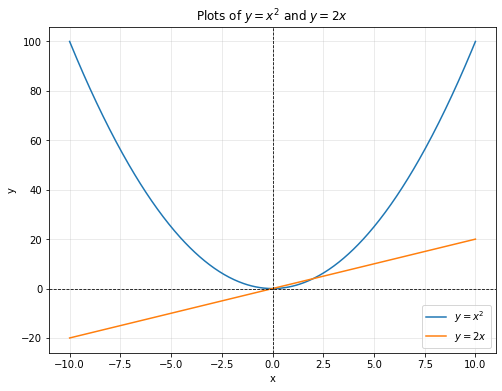

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Define x values
x = np.linspace(-10, 10, 500)

# Define the functions
y1 = x**2
y2 = 2 * x

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="$y = x^2$")
plt.plot(x, y2, label="$y = 2x$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Add labels, title, and legend
plt.title("Plots of $y = x^2$ and $y = 2x$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()
## Example: $f(x) = x^2$


## Example: $f(x) = x^3$

$$
\begin{align}
f'(x) &= \text{st}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
&=\text{st}\frac{(x+\Delta x)^3-x^3}{\Delta x}\\
&=\text{st}\frac{x^3+3x^2\Delta x +3x(\Delta x)^2 + (\Delta x)^3-x^3}{\Delta x}\\
&=\text{st}\frac{3x^2\Delta x +3x(\Delta x)^2 + (\Delta x)^3}{\Delta x}\\
&=\text{st}(3x^2+3x\Delta x+ (\Delta x)^2\\
&= 3x^2
\end{align}
$$

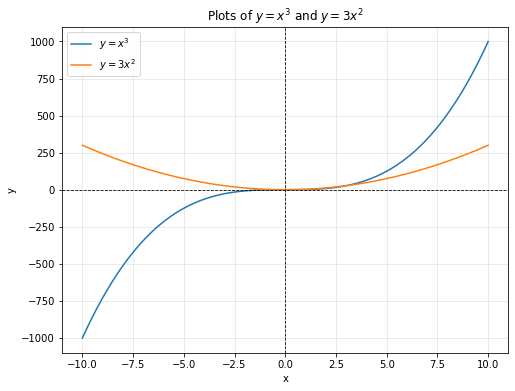

In [4]:
# Define the functions
y1 = x**3
y2 = 3 * x**2

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="$y = x^3$")
plt.plot(x, y2, label="$y = 3x^2$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Add labels, title, and legend
plt.title("Plots of $y = x^3$ and $y = 3x^2$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


# Example: $f(x) = \sqrt{x}$

$$
\begin{align}
f'(x) &= \text{st}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
&=\text{st}\frac{\sqrt{x+\Delta x} - \sqrt{x}}{\Delta x}\\
&=\text{st}\frac{(\sqrt{x+\Delta x} - \sqrt{x})(\sqrt{x+\Delta x} + \sqrt{x})}{\Delta x (\sqrt{x+\Delta x} + \sqrt{x})}\\
&=\text{st}\frac{x+\Delta x - x}{\Delta x (\sqrt{x+\Delta x} + \sqrt{x})}\\
&=\text{st}\frac{\Delta x}{\Delta x (\sqrt{x+\Delta x} + \sqrt{x})}\\
&=\frac{1}{\sqrt{x+\Delta x} + \sqrt{x}}\\
&= \frac{1}{2\sqrt{x}}
\end{align}
$$

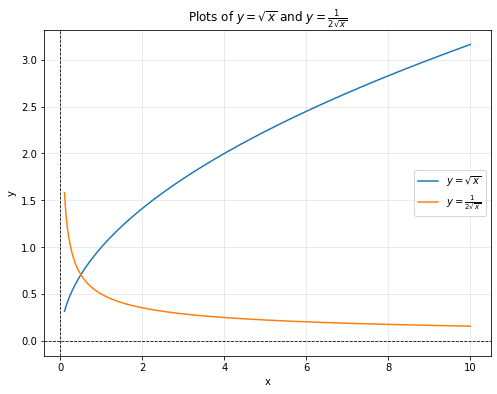

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define x values
x = np.linspace(0.1, 10, 500)

# Define the functions
y1 = np.sqrt(x)
y2 = 1 / (2 * np.sqrt(x))

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="$y = \sqrt{x}$")
plt.plot(x, y2, label="$y = \\frac{1}{2\sqrt{x}}$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Add labels, title, and legend
plt.title("Plots of $y = \sqrt{x}$ and $y = \\frac{1}{2\sqrt{x}}$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


## Example: $f(x) = \frac{1}{x}$

$$
\begin{align}
f'(x) &= \text{st}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
&=\text{st}\frac{\frac{1}{x+\Delta x} - \frac{1}{x}}{\Delta x}\\
&=\text{st}\frac{\frac{x - (x+\Delta x)}{x(x+\Delta x)}}{\Delta x}\\
&=\text{st}\frac{-\Delta x}{\Delta x \cdot x(x+\Delta x)}\\
&=\text{st}\frac{-1}{x(x+\Delta x)}\\
&= -\frac{1}{x^2}
\end{align}
$$

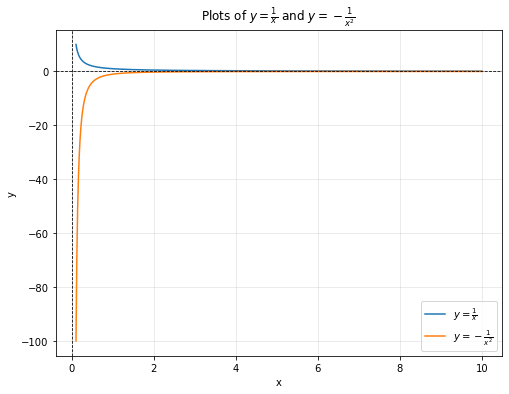

In [6]:
# Define the functions
y1 = 1 / x
y2 = -1 / (x**2)

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="$y = \\frac{1}{x}$")
plt.plot(x, y2, label="$y = -\\frac{1}{x^2}$")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Add labels, title, and legend
plt.title("Plots of $y = \\frac{1}{x}$ and $y = -\\frac{1}{x^2}$")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()


## Example: $f(x) = |x|$

$$
\begin{align}
f'(x) &= \text{st}\frac{f(x+\Delta x)-f(x)}{\Delta x}\\
&=\text{st}\frac{|x+\Delta x| - |x|}{\Delta x}.
\end{align}
$$

For $x > 0$:
$$
f'(x) = \text{st}\frac{x+\Delta x - x}{\Delta x} = 1.
$$

For $x < 0$:
$$
f'(x) = \text{st}\frac{-(x+\Delta x) + x}{\Delta x} = -1.
$$

For $x = 0$, the derivative does not exist because the left-hand limit and right-hand limit differ.


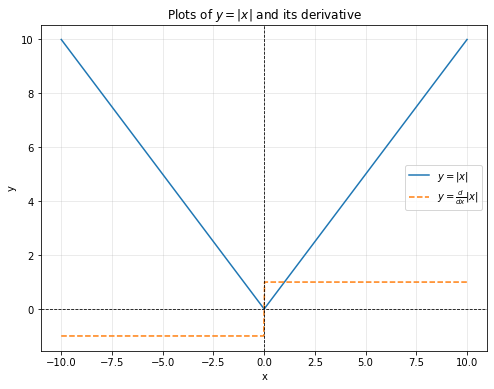

In [7]:
# Define the functions
x = np.linspace(-10, 10, 500)
y1 = np.abs(x)
y2 = np.piecewise(x, [x > 0, x < 0], [1, -1])

# Plot the functions
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="$y = |x|$")
plt.plot(x, y2, label="$y = \\frac{d}{dx}|x|$", linestyle="--")
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')

# Add labels, title, and legend
plt.title("Plots of $y = |x|$ and its derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.3)

# Show the plot
plt.show()

## Differentials and Tangent Lines

Suppose we are given a curve $y = f(x)$ and at a point $(a, b)$ on the curve the slope $f'(a)$ is defined. Then the **tangent line** to the curve at the point $(a, b)$ is defined to be the straight line which passes through the point $(a, b)$ and has the same slope as the curve at $x = a$. 

The tangent line is given by the equation:

$$
l(x) - b = f'(a)(x - a),
$$

or equivalently:

$$
l(x) = f'(a)(x - a) + b.
$$




### Example 1: Tangent Line to $y = x^3$

For the curve $y = x^3$, find the tangent lines at the points:

- $(0, 0)$
- $(1, 1)$
- $\left(-\frac{1}{2}, -\frac{1}{8}\right)$






#### Step-by-step solution:

The slope is given by:

$$
f'(x) = 3x^2.
$$

- At $x = 0$: $f'(0) = 3 \cdot 0^2 = 0$.  
  The tangent line has the equation:

  $$
  y = 0(x - 0) + 0, \quad \text{or} \quad y = 0.
  $$

- At $x = 1$: $f'(1) = 3 \cdot 1^2 = 3$.  
  The tangent line has the equation:

  $$
  y = 3(x - 1) + 1, \quad \text{or} \quad y = 3x - 2.
  $$

- At $x = -\frac{1}{2}$: $f'\left(-\frac{1}{2}\right) = 3 \left(-\frac{1}{2}\right)^2 = \frac{3}{4}$.  
  The tangent line has the equation:

  $$
  y = \frac{3}{4}\left(x + \frac{1}{2}\right) - \frac{1}{8}, \quad \text{or} \quad y = \frac{3}{4}x + \frac{1}{8}.
  $$





### Visualization


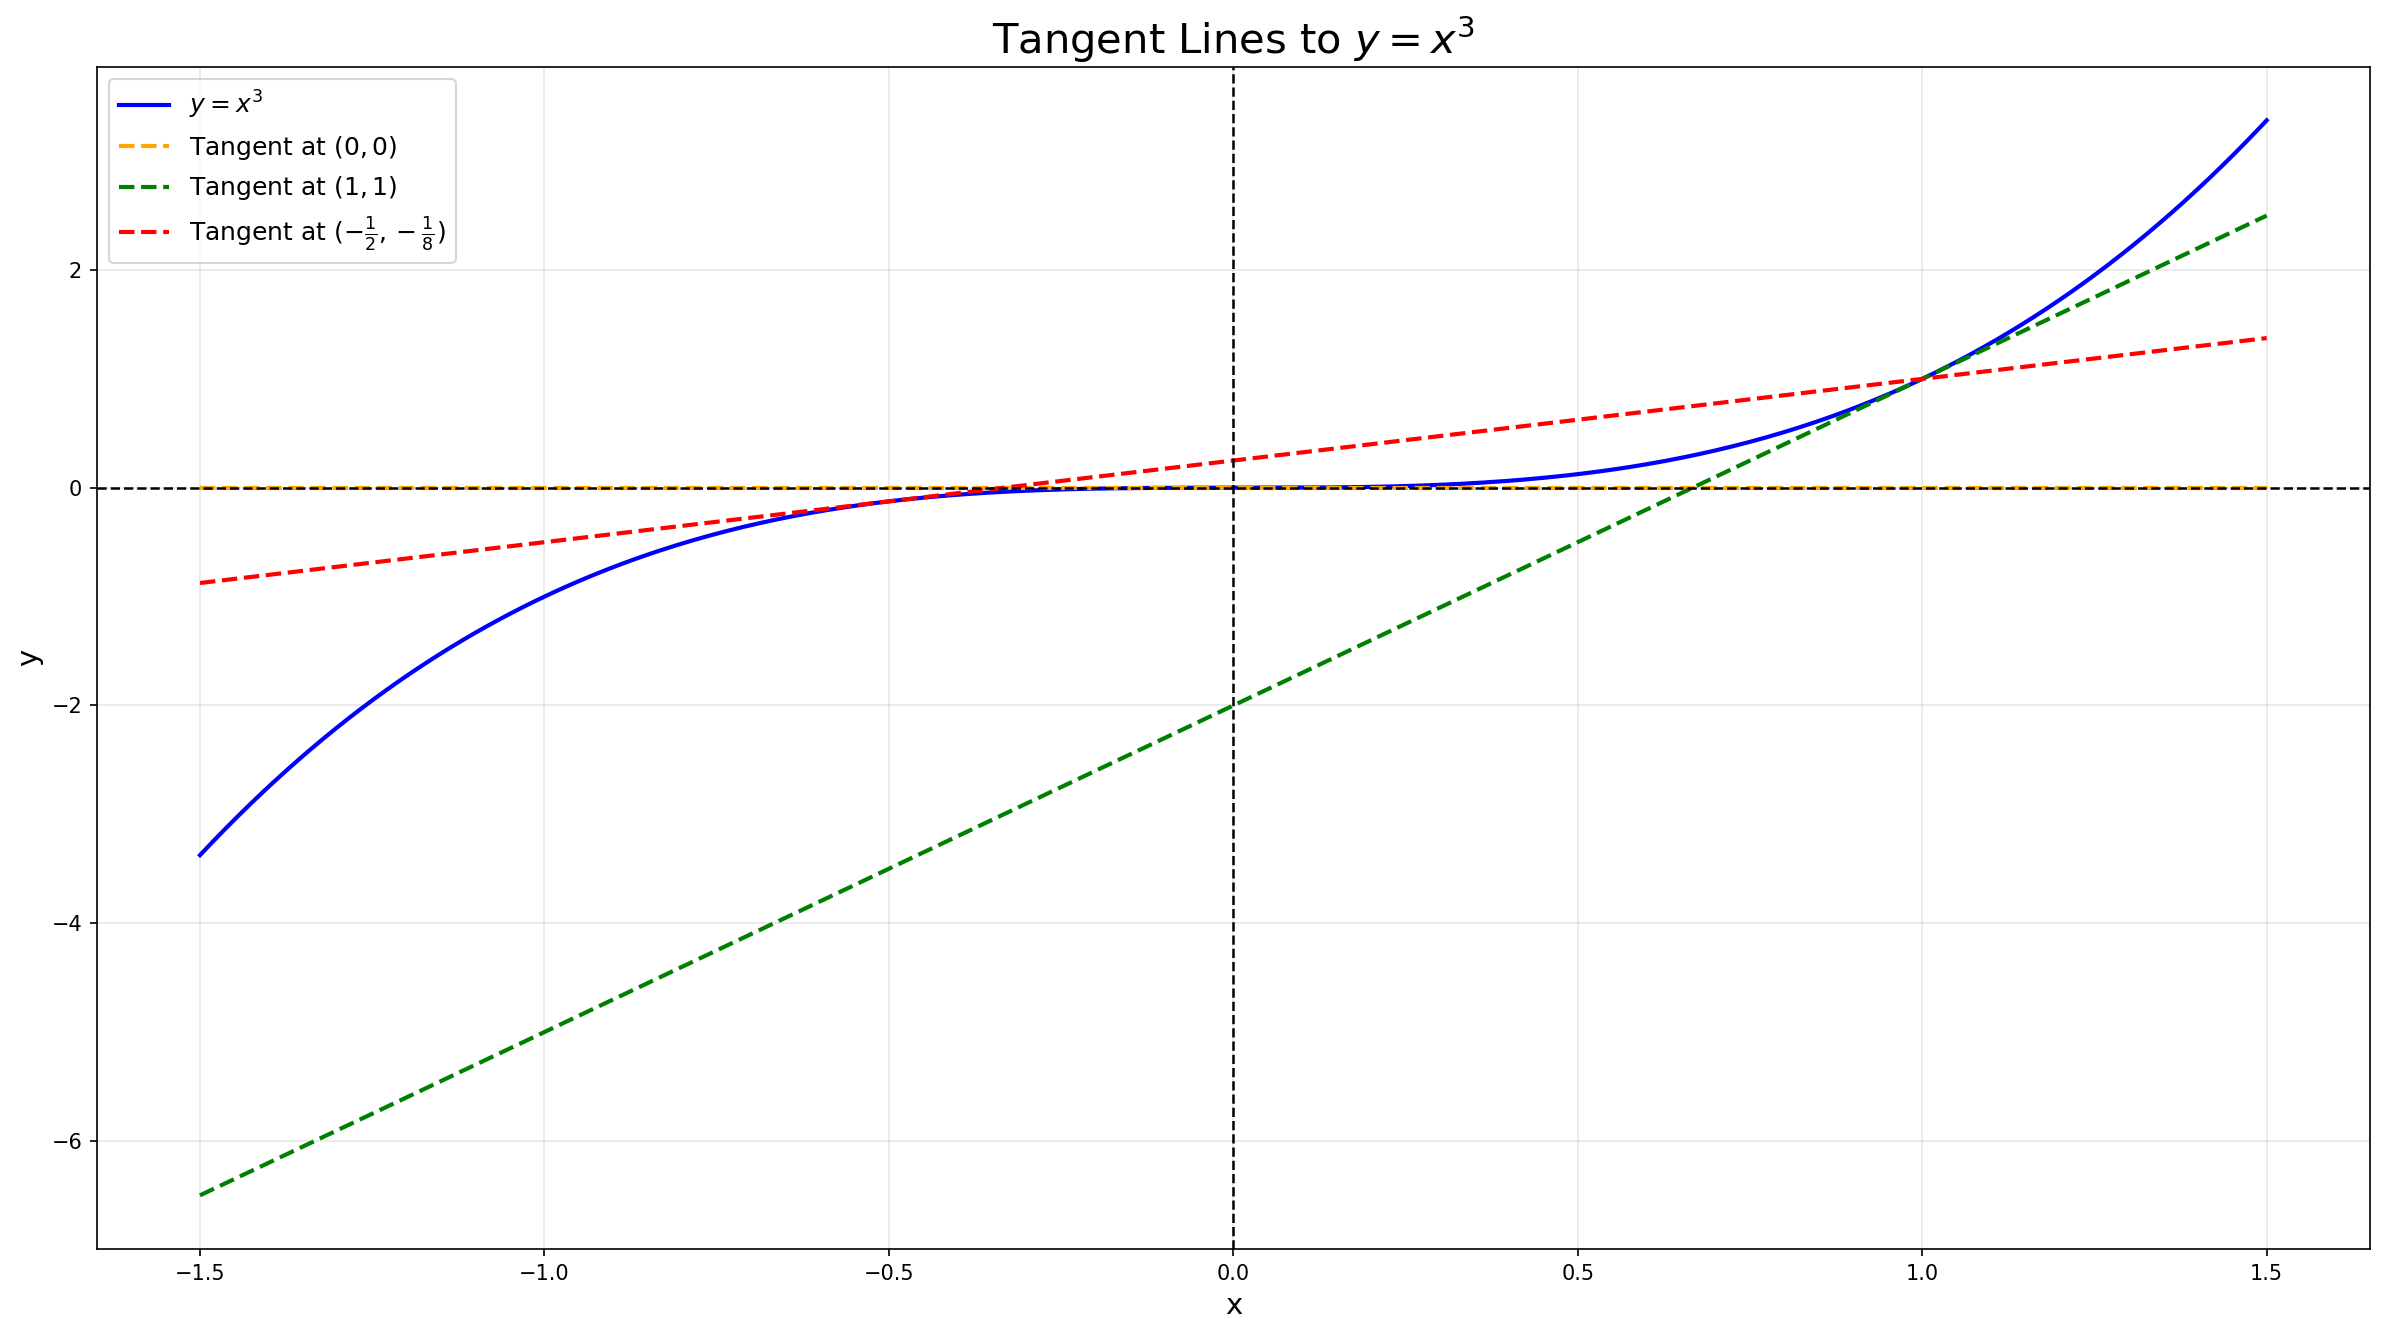

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values and the function y = x^3
x = np.linspace(-1.5, 1.5, 500)
y = x**3

# Define the tangent lines
tangent1 = 0 * x  # At (0, 0)
tangent2 = 3 * (x - 1) + 1  # At (1, 1)
tangent3 = (3/4) * (x + 0.5) - 1/8  # At (-1/2, -1/8)

# Plot the function and tangent lines
plt.figure(figsize=(16, 9), dpi=150)  # Large fullscreen dimensions
plt.plot(x, y, label="$y = x^3$", color="blue", linewidth=2)
plt.plot(x, tangent1, label="Tangent at $(0, 0)$", linestyle="--", color="orange", linewidth=2)
plt.plot(x, tangent2, label="Tangent at $(1, 1)$", linestyle="--", color="green", linewidth=2)
plt.plot(x, tangent3, label="Tangent at $(-\\frac{1}{2}, -\\frac{1}{8})$", linestyle="--", color="red", linewidth=2)

# Add annotations and labels
plt.axhline(0, color='black', linewidth=1.2, linestyle='--')
plt.axvline(0, color='black', linewidth=1.2, linestyle='--')
plt.title("Tangent Lines to $y = x^3$", fontsize=20)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend(fontsize=12, loc="upper left")
plt.grid(alpha=0.3)

# Adjust layout to maximize screen usage
plt.tight_layout()

# Show the plot
plt.show()


## Increment Theorem

Let $y = f(x)$. Suppose $f'(x)$ exists at a certain point $x$, and $\Delta x$ is infinitesimal. Then $\Delta y$ is infinitesimal, and:

$$
\Delta y = f'(x)\Delta x + \epsilon \Delta x
$$

for some infinitesimal $\epsilon$, which depends on $x$ and $\Delta x$.

---

### Proof

#### Case 1: $\Delta x = 0$
In this case, $\Delta y = f'(x)\Delta x = 0$, and we put $\epsilon = 0$.

#### Case 2: $\Delta x \neq 0$
Then:

$$
\frac{\Delta y}{\Delta x} \approx f'(x),
$$

so for some infinitesimal $\epsilon$:

$$
\frac{\Delta y}{\Delta x} = f'(x) + \epsilon.
$$

Multiplying both sides by $\Delta x$:

$$
\Delta y = f'(x)\Delta x + \epsilon \Delta x.
$$


## Differentials

**DEFINITION**

Suppose $y$ depends on $x$, $y = f(x)$.

(i) The **differential** of $x$ is the independent variable ${dx} = \Delta x$.  
(ii) The **differential** of $y$ is the dependent variable ${dy}$ given by  
$$
{dy} = f'(x) \mathrm{dx}.
$$

When ${dx} \neq 0$, the equation above may be rewritten as  
$$
\frac{{dy}}{{dx}} = f'(x).
$$

Compare this equation with  
$$
\frac{\Delta y}{\Delta x} \approx f'(x).
$$

The quotient ${dy}/{dx}$ is a very convenient alternative symbol for the derivative $f'(x)$.  

The differential ${dy}$ depends on two independent variables $x$ and ${dx}$. In functional notation,  
$$
{dy} = {d}f(x, {dx}),
$$
where $df$ is the real function of two variables defined by  
$$
{d}f(x, {dx}) = f'(x) {dx}.
$$


**THEOREM**

The derivative of a linear function is equal to the coefficient of $x$. That is,

$$
\frac{d(bx + c)}{dx} = b, \quad d(bx + c) = b \, dx.
$$

**PROOF** Let $y = bx + c$, and let $\Delta x \neq 0$ be infinitesimal. Then:

$$
y + \Delta y = b(x + \Delta x) + c,
$$

$$
\Delta y = (b(x + \Delta x) + c) - (bx + c) = b \Delta x,
$$

$$
\frac{\Delta y}{\Delta x} = \frac{b \Delta x}{\Delta x} = b.
$$

Therefore:

$$
\frac{dy}{dx} = \text{st}(b) = b.
$$


**THEOREM (Sum Rule)**

Suppose $u$ and $v$ depend on the independent variable $x$. Then for any value of $x$ where $\frac{du}{dx}$ and $\frac{dv}{dx}$ exist:

$$
\frac{d(u + v)}{dx} = \frac{du}{dx} + \frac{dv}{dx}, \quad d(u + v) = du + dv.
$$

In other words, the derivative of the sum is the sum of the derivatives.

---

**PROOF**  
Let $y = u + v$, and let $\Delta x \neq 0$ be infinitesimal. Then:

$$
y + \Delta y = (u + \Delta u) + (v + \Delta v),
$$

$$
\Delta y = [(u + \Delta u) + (v + \Delta v)] - [u + v] = \Delta u + \Delta v,
$$

$$
\frac{\Delta y}{\Delta x} = \frac{\Delta u + \Delta v}{\Delta x} = \frac{\Delta u}{\Delta x} + \frac{\Delta v}{\Delta x}.
$$

Taking standard parts:

$$
\text{st}\left(\frac{\Delta y}{\Delta x}\right) = \text{st}\left(\frac{\Delta u}{\Delta x} + \frac{\Delta v}{\Delta x}\right) = \text{st}\left(\frac{\Delta u}{\Delta x}\right) + \text{st}\left(\frac{\Delta v}{\Delta x}\right).
$$

Thus:

$$
\frac{dy}{dx} = \frac{du}{dx} + \frac{dv}{dx}.
$$


**THEOREM (Constant Rule)**

Suppose $u$ depends on $x$, and $c$ is a real number. Then for any value of $x$ where $\frac{du}{dx}$ exists:

$$
\frac{d(cu)}{dx} = c \frac{du}{dx}, \quad d(cu) = c \, du.
$$

---

**PROOF**  
Let $y = cu$, and let $\Delta x \neq 0$ be infinitesimal. Then:

$$
y + \Delta y = c(u + \Delta u),
$$

$$
\Delta y = c(u + \Delta u) - cu = c \, \Delta u,
$$

$$
\frac{\Delta y}{\Delta x} = \frac{c \, \Delta u}{\Delta x} = c \frac{\Delta u}{\Delta x}.
$$

Taking standard parts:

$$
\text{st}\left(\frac{\Delta y}{\Delta x}\right) = \text{st}\left(c \frac{\Delta u}{\Delta x}\right) = c \, \text{st}\left(\frac{\Delta u}{\Delta x}\right).
$$

Thus:

$$
\frac{dy}{dx} = c \frac{du}{dx}.
$$


**THEOREM (Product Rule)**

Suppose $u$ and $v$ depend on $x$. Then for any value of $x$ where $\frac{du}{dx}$ and $\frac{dv}{dx}$ exist:

$$
\frac{d(uv)}{dx} = u \frac{dv}{dx} + v \frac{du}{dx}, \quad d(uv) = u \, dv + v \, du.
$$

---

**PROOF**  
Let $y = uv$, and let $\Delta x \neq 0$ be infinitesimal. Then:

$$
y + \Delta y = (u + \Delta u)(v + \Delta v),
$$

$$
\Delta y = (u + \Delta u)(v + \Delta v) - uv = u \Delta v + v \Delta u + \Delta u \Delta v,
$$

$$
\frac{\Delta y}{\Delta x} = \frac{u \Delta v + v \Delta u + \Delta u \Delta v}{\Delta x} = u \frac{\Delta v}{\Delta x} + v \frac{\Delta u}{\Delta x} + \frac{\Delta u \Delta v}{\Delta x}.
$$

$\Delta u$ is infinitesimal by the Increment Theorem, whence:

$$
\text{st}\left(\frac{\Delta y}{\Delta x}\right) = \text{st}\left(u \frac{\Delta v}{\Delta x} + v \frac{\Delta u}{\Delta x} + \frac{\Delta u \Delta v}{\Delta x}\right),
$$

$$
= u \cdot \text{st}\left(\frac{\Delta v}{\Delta x}\right) + v \cdot \text{st}\left(\frac{\Delta u}{\Delta x}\right) + 0 \cdot \text{st}\left(\frac{\Delta u}{\Delta x}\right).
$$

Thus:

$$
\frac{dy}{dx} = u \frac{dv}{dx} + v \frac{du}{dx}.
$$


**THEOREM (Quotient Rule)**

Suppose $u, v$ depend on $x$. Then for any value of $x$ where $\frac{du}{dx}$, $\frac{dv}{dx}$ exist and $v \neq 0$:

$$
\frac{d\left(\frac{u}{v}\right)}{dx} = \frac{v \frac{du}{dx} - u \frac{dv}{dx}}{v^2}, \quad d\left(\frac{u}{v}\right) = \frac{v \, du - u \, dv}{v^2}.
$$

---

**PROOF**  
We combine the Product Rule and the formula for $d\left(\frac{1}{v}\right)$. Let $y = \frac{u}{v}$. We write $y$ in the form:

$$
y = \frac{1}{v} \cdot u.
$$

Then:

$$
dy = d\left(\frac{1}{v} \cdot u\right) = \frac{1}{v} \, du + u \, d\left(\frac{1}{v}\right),
$$

$$
= \frac{1}{v} \, du + u \, \left(-v^{-2}\right) \, dv,
$$

$$
= \frac{v \, du - u \, dv}{v^2}.
$$
